In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_parquet('C:/Users/Olimpio.Dasilva/Desktop/MACHINE LEARNING/DATA/reporting_ncr_all_transactions_202302131044.parquet')
df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081506.csv')
#df = pd.read_excel('C:/Users/Olimpio.Dasilva/Documents/GitHub/merchant_tagging/hive_metastore.smartlink_sz_db.afs_merchant_category_mapping_preview_2023_03_27.xlsx')
pd.set_option('display.max_colwidth', None)
df = df.sample(1000)
df.head(5)


,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name
872087,DI4090,Ae15e0f73f7603ce2a92ec9dc9a61aeb9,T01c615ded1d4335fb440e68bf4ab5a79,19.84,USD,Withdrawal #*,DOLLAR GE DG *626 DAYTON TX,TX,2023-01-25,10880.0,DOLLAR GENERAL,Unknow Payment Agent,NaN,2023-01-29,FTS_CSLK_TRANSAC_20230128_100006.csv,Community Resource Credit Union
1059142,DI3712,A3842382a36b7396cb21b1e1b75c7c58a,T7d5ac1944e1031989d59e1ae2b48b13b,17.88,USD,TARGET 00006,JACKSONVILLE FLUS : POS Transaction,NaN,2023-01-09,12734.0,TARGET,Unknow Payment Agent,NaN,2023-01-11,FTS_CSLK_TRANSAC_20230110_100006.csv,Tropical Financial Credit Union
1053503,DI3482,A010c0b164a94328f8da20dee4d16ac7d,T47e833f56cd331afa4ccf9c90f11e99d,4.99,USD,DEBIT CARD DEBIT,auth #* 09-04-2022 Prime Video*1V38 888-802-3080 WA *,WA,2022-09-04,13669.0,AMAZONVOD,Unknow Payment Agent,",,,,,,,,,",2022-09-06,FTS_CSLK_TRANSAC_20220905_100007.csv,Kinetic Federal Credit Union
1124400,DI1690,Ab9b7fd3ebf76303d9afa78965146f1db,T049d6077f55735309a2cc9257f0a3c99,0.97,USD,POS PURCHASE CIRCLE K 08195,318-865-6985 LA * *****9486 12/01,NaN,2022-12-05,10628.0,CIRCLE K,Unknow Payment Agent,NaN,2022-12-08,FTS_CSLK_TRANSAC_20221207_100006.csv,Citizens National Bank
55962,DI3337,A3840091ec7f33cff9afce439005151da,Te773bb2b31bc38aebcc4a088f8f724ec,122.76,USD,Withdrawal #**,COSTCO WHSE #0436 TEMPE AZ,AZ,2022-12-19,10725.0,COSTCO,Unknow Payment Agent,NaN,2022-12-22,FTS_CSLK_TRANSAC_20221221_100007.csv,Arizona Federal Credit Union


In [3]:
df.shape

(1000, 16)

In [4]:
# Selecting only known merchants names from the original dataset
#df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True)
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)

In [5]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [6]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS
872087,T01c615ded1d4335fb440e68bf4ab5a79,Withdrawal #*,DOLLAR GE DG *626 DAYTON TX,Unknow Payment Agent,DOLLAR GENERAL,Withdrawal #* %%%%% DOLLAR GE DG *626 DAYTON TX
1059142,T7d5ac1944e1031989d59e1ae2b48b13b,TARGET 00006,JACKSONVILLE FLUS : POS Transaction,Unknow Payment Agent,TARGET,TARGET 00006 %%%%% JACKSONVILLE FLUS : POS Transaction
1053503,T47e833f56cd331afa4ccf9c90f11e99d,DEBIT CARD DEBIT,auth #* 09-04-2022 Prime Video*1V38 888-802-3080 WA *,Unknow Payment Agent,AMAZONVOD,DEBIT CARD DEBIT %%%%% auth #* 09-04-2022 Prime Video*1V38 888-802-3080 WA *
1124400,T049d6077f55735309a2cc9257f0a3c99,POS PURCHASE CIRCLE K 08195,318-865-6985 LA * *****9486 12/01,Unknow Payment Agent,CIRCLE K,POS PURCHASE CIRCLE K 08195 %%%%% 318-865-6985 LA * *****9486 12/01
55962,Te773bb2b31bc38aebcc4a088f8f724ec,Withdrawal #**,COSTCO WHSE #0436 TEMPE AZ,Unknow Payment Agent,COSTCO,Withdrawal #** %%%%% COSTCO WHSE #0436 TEMPE AZ


In [7]:
# Copy of the afs merchant names column
df_known_merchs['AFS_PAYMENT_AGENTS'] = df_known_merchs['payment_agent'] 
# Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

In [8]:
df_known_merchs

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES
872087,T01c615ded1d4335fb440e68bf4ab5a79,Withdrawal #* %%%%% DOLLAR GE DG *626 DAYTON TX,Unknow Payment Agent,DOLLAR GENERAL
1059142,T7d5ac1944e1031989d59e1ae2b48b13b,TARGET 00006 %%%%% JACKSONVILLE FLUS : POS Transaction,Unknow Payment Agent,TARGET
1053503,T47e833f56cd331afa4ccf9c90f11e99d,DEBIT CARD DEBIT %%%%% auth #* 09-04-2022 Prime Video*1V38 888-802-3080 WA *,Unknow Payment Agent,AMAZONVOD
1124400,T049d6077f55735309a2cc9257f0a3c99,POS PURCHASE CIRCLE K 08195 %%%%% 318-865-6985 LA * *****9486 12/01,Unknow Payment Agent,CIRCLE K
55962,Te773bb2b31bc38aebcc4a088f8f724ec,Withdrawal #** %%%%% COSTCO WHSE #0436 TEMPE AZ,Unknow Payment Agent,COSTCO
...,...,...,...,...
690963,Ta50a83a719793f4fa6b8219d43c5edf0,MCDONALD'S F22585 JAMESTOWN %%%%% OHUS : POS Transaction REF:***16375 PUR DATE:*25,Unknow Payment Agent,MCDONALD'S
1037500,T9ea1eac099b437fd91935f0e980f0f29,Withdrawal #2Q5UL4346V65 %%%%% AMAZON.COM*1F19X2IJ2 SEATTLE WA %% Card 25 #4365,Unknow Payment Agent,AMAZON.COM
948731,T9e2709ee954d37bc80a02cecaf668602,Withdrawal #* %%%%% POS CASEYS #1197 117 E NORTH PECULIAR MO %% Card 15 #4603,Unknow Payment Agent,CASEY'S GENERAL STORES
1284119,T280075bd282137bead96210225c54b75,Withdrawal #** %%%%% AMAZON.COM*FQ6UE9LJ3 SEATTLE WA %% Card 15 #6462,Unknow Payment Agent,AMAZON.COM


In [9]:
def check_names(merchant, t_details):
    
    # Variations for merchant name column
    merchant_1 = merchant
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/%]', ' ', merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + merchant.split()
    
    # Variations for transaction details column
    t_details_1 = t_details
    t_details_2 = t_details.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/%]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
    
    #################################
    
    #################################
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + details_lis + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + t_details.split() + date_pattern.split()
    
    # Conditions to check if words are in transaction strings
    if (merchant in t_details_3 or t_details_3 in merchant or           #VEEEEEERRRR  merchant in t_details_3 or t_details_3 in merchant or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or 
        (merchant_3 in t_details_3 or t_details_3 in merchant_3) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (merchant_1 in t_details_3 or t_details_1 in merchant_4) or
        (merchant_1 in details_lis_1 or merchant_4 in details_lis)or
        (any(item in merch_list for item in details_lis_1)) or
        (merchant_1[:4] in t_details_1)):
        return True
    else:
        return False

In [10]:
# Checking if merchant names are mentioned in the transaction description
df_known_merchs['CHECK_MERCH_TRA'] = df_known_merchs.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.TRANSACTION_DETAILS), axis=1)
df_known_merchs.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
872087,T01c615ded1d4335fb440e68bf4ab5a79,Withdrawal #* %%%%% DOLLAR GE DG *626 DAYTON TX,Unknow Payment Agent,DOLLAR GENERAL,True
1059142,T7d5ac1944e1031989d59e1ae2b48b13b,TARGET 00006 %%%%% JACKSONVILLE FLUS : POS Transaction,Unknow Payment Agent,TARGET,True
1053503,T47e833f56cd331afa4ccf9c90f11e99d,DEBIT CARD DEBIT %%%%% auth #* 09-04-2022 Prime Video*1V38 888-802-3080 WA *,Unknow Payment Agent,AMAZONVOD,True
1124400,T049d6077f55735309a2cc9257f0a3c99,POS PURCHASE CIRCLE K 08195 %%%%% 318-865-6985 LA * *****9486 12/01,Unknow Payment Agent,CIRCLE K,True
55962,Te773bb2b31bc38aebcc4a088f8f724ec,Withdrawal #** %%%%% COSTCO WHSE #0436 TEMPE AZ,Unknow Payment Agent,COSTCO,True


In [11]:
# Merchant name in the transaction description
print('Merchant name in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == True).sum() )

Merchant name in the transaction description:
 984


In [12]:
#df_known_class_pred = df_known_merchs[['transaction_id','category','TRANSACTION_DETAILS','AFS_MECHANT_NAMES']].copy(deep=True)
df_known_class_pred = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_MECHANT_NAMES']].copy(deep=True)
df_known_class_pred['AFS_MECHANT_NAMES'] = df_known_class_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_class_pred['TRANSACTION_DETAILS']= df_known_class_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [13]:
df_known_class_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
872087,T01c615ded1d4335fb440e68bf4ab5a79,withdrawal %%%%% dollar ge dg 626 dayton tx,dollar general
1059142,T7d5ac1944e1031989d59e1ae2b48b13b,target 00006 %%%%% jacksonville flus : pos transaction,target
1053503,T47e833f56cd331afa4ccf9c90f11e99d,debit card debit %%%%% auth 09-04-2022 prime video 1v38 888-802-3080 wa,amazonvod
1124400,T049d6077f55735309a2cc9257f0a3c99,pos purchase circle k 08195 %%%%% 318-865-6985 la 9486 12/01,circle k
55962,Te773bb2b31bc38aebcc4a088f8f724ec,withdrawal %%%%% costco whse 0436 tempe az,costco
935505,T80e8830d37b43d27bf559b6ddf193b78,withdrawal %%%%% tractor supply 10710 ea hopkinsville ky %% card 18 1288,tractor supply company
1105941,T8194b7049b883118bde4b00402a9ecd4,point of sale withdrawal %%%%% circle k 03236 11721 g louisville kyus,circle k
493537,T97e0988627f0336eb6728b961b5014c4,withdrawal consumer debit %%%%% mcdonald's m7327 of tx mesquite tx date 07/16/22 03160 5814 %% card 15 0134,mcdonald's
214678,T4f74da55ad273b8a89b8e0f80b28f1e4,withdrawal debit advance auto %%%%% parts 953saint cloud flus,advance auto parts
623582,T2e361f9aa3cf3456944d5546dfb33c54,ckcd debit 3094 05/20 19:15 raceway 67 95 467 south hill va %%%%% nan,raceway


In [14]:
def top_hists(t_pred, t_test):
    
    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create the horizontal bar plot
    plt.figure(figsize=(6,6))
    sns.barplot(x=top_10_counts, y=top_10_labels, orient='h')
    plt.title('Histogram of Top 10 Labels')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 predicted labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create a horizontal bar plot for the top 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(top_10_labels)), top_10_counts, align='center')
    plt.yticks(range(len(top_10_labels)), top_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Top 10 Predicted Labels')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by ascending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=False)

    # get the least 10 predicted labels and their counts
    least_10_labels = sorted_labels[:10]
    least_10_counts = [value_counts[label] for label in least_10_labels]

    # create a horizontal bar plot for the least 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(least_10_labels)), least_10_counts, align='center')
    plt.yticks(range(len(least_10_labels)), least_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Least 10 Predicted Labels')
    plt.show()

    return

In [15]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred, normalize='true')

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    

    # # sort the labels by ascending order of count
    # sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # # print the 10 least predicted labels by count
    # for label2 in sorted_labels2[:10]:
    #     print(f"{label2}: {value_counts[label2]}")
    

    # # get the indices of the top 10 predicted values
    # least_10_labels = sorted_labels2[:10]

    # # filter the true and predicted labels to only include the top 10 labels
    # least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    # least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # # create the confusion matrix
    # cm = confusion_matrix(least_10_true, least_10_pred, normalize='true')

    # # plot the confusion matrix
    # fig, ax = plt.subplots(figsize=(6, 6))
    # sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=least_10_labels + ["Other"], yticklabels=least_10_labels + ["Other"])
    # plt.xlabel("Predicted Label")
    # plt.ylabel("True Label")
    # plt.show()
    
    return cm

In [16]:
def df_description(clss, a_test,a_pred,a_train,b_train,b_test):     
    #(classifier, y_test, y_pred, y_train,X_train,X_test)
    
    print('Accuracy : {0:0.3f}'.format(accuracy_score(a_test, a_pred)))
    
    #========================================================================================================================
    
    
    print('Number of unique merchants in the test set: ', len(a_test.unique()))
    print('Number of unique merchants in the predicted set: ', len(np.unique(a_pred)))
    print('Number of unique merchants in train set: ', len(a_train.unique()))
    print('\nNumber of unique "Transaction Details" rows in test set: ', len(b_train.unique()))
    print('Number of unique "Transaction Details" rows in train set: ', len(b_test.unique()))
    print('\nTotal number of rows in the train set: ', len(b_train))
    print('Total number of rows in the test set', len(b_test))
    
    
    train_acc = accuracy_score(a_train, clss.predict(b_train))
    test_acc = accuracy_score(a_test, a_pred)
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    
    
    #========================================================================================================================
    
    
    # Get the classification report as a string
    report_dict = metrics.classification_report(a_test, a_pred, zero_division=0, output_dict=True)

    # Convert the report dictionary to a pandas dataframe
    report_data = pd.DataFrame(report_dict).transpose()
    
    precision_count = (report_data['precision'] == 1).sum()
    total_categories = report_data.shape[0]
    precision_percentage = precision_count / total_categories * 100
    
    print('\n===================================\n')
    print('Percentage of best precision', precision_percentage)
    
    recall_count = (report_data['recall'] == 1).sum()
    total_categories = report_data.shape[0]
    recall_percentage = recall_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best recall', recall_percentage)
    
    f1score_count = (report_data['f1-score'] == 1).sum()
    total_categories = report_data.shape[0]
    f1score_percentage = f1score_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best f1score', f1score_percentage)
    
    print('===================================\n')
    
    
    top_hists(a_pred, a_test)
    c_matrix(a_pred, a_test)
    
    return

In [17]:
def l_curve(clss, xt, yt):
    #classifier, X_train_oversampled,y_train_oversampled
    
    train_sizes, train_scores, test_scores = learning_curve(
        clss, xt[:, 0], yt, cv=5, scoring='f1_macro', 
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=99
    )
    
    # train_sizes, train_scores, test_scores = learning_curve(
    #     clss, xt, yt, cv=5, scoring='f1_macro', 
    #     train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=99
    # )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return

In [18]:
def report_chart(report):
    dfaa = pd.DataFrame(report).transpose()
    
    # Sort DataFrame by F1-score column in descending order
    df_sorted = dfaa.sort_values(by=['f1-score'], ascending=False)

    # Get top 10 predicted classes
    top_50 = df_sorted.head(50)

    # Create new DataFrame with only top 10 classes
    df_top_50 = dfaa.loc[top_50.index]

    # Transpose new DataFrame
    df_top_50 = df_top_50[['precision', 'recall', 'f1-score']]

    # Create stacked bar chart
    fig, ax = plt.subplots(figsize=(5, 30)) # Set figure size
    ax = df_top_50.plot(kind='barh', stacked=True, ax=ax)

    # Set chart title and labels
    ax.set_title('Classification Report - Top 20 Classes')
    ax.set_xlabel('Score')
    ax.set_ylabel('Class')

    # Display chart
    plt.show()
    
    return dfaa

In [19]:
def train(classifier, X, y):
    

    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)        
    
    # Random over-sampling due to imbalanced classes
    resampler = RandomOverSampler(random_state=0)
    X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train) 
    #sns.countplot(x=y_train_oversampled)  
    
    l_curve(classifier, X_train_oversampled, y_train_oversampled) 
    #l_curve(classifier, X_train, y_train)
  
  
    classifier.fit(X_train_oversampled[:, 0], y_train_oversampled) 
    #classifier.fit(X_train, y_train)                                                        
    end = time.time()                                                                                
    
    y_pred = classifier.predict(X_test) 
  
  
    df_description(classifier, y_test, y_pred, y_train,X_train,X_test)
    # top_hists(y_pred, y_test)
    # c_matrix(y_pred, y_test)
    c_report = metrics.classification_report(y_test, y_pred, output_dict=True) 
    report_chart(c_report)
    print('\n\n', metrics.classification_report(y_test, y_pred))
    #print('\n\n', c_report)
    
    
    return classifier


In [20]:
df_known_class_pred

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
872087,T01c615ded1d4335fb440e68bf4ab5a79,withdrawal %%%%% dollar ge dg 626 dayton tx,dollar general
1059142,T7d5ac1944e1031989d59e1ae2b48b13b,target 00006 %%%%% jacksonville flus : pos transaction,target
1053503,T47e833f56cd331afa4ccf9c90f11e99d,debit card debit %%%%% auth 09-04-2022 prime video 1v38 888-802-3080 wa,amazonvod
1124400,T049d6077f55735309a2cc9257f0a3c99,pos purchase circle k 08195 %%%%% 318-865-6985 la 9486 12/01,circle k
55962,Te773bb2b31bc38aebcc4a088f8f724ec,withdrawal %%%%% costco whse 0436 tempe az,costco
...,...,...,...
690963,Ta50a83a719793f4fa6b8219d43c5edf0,mcdonald's f22585 jamestown %%%%% ohus : pos transaction ref: 16375 pur date: 25,mcdonald's
1037500,T9ea1eac099b437fd91935f0e980f0f29,withdrawal 2q5ul4346v65 %%%%% amazon.com 1f19x2ij2 seattle wa %% card 25 4365,amazon.com
948731,T9e2709ee954d37bc80a02cecaf668602,withdrawal %%%%% pos caseys 1197 117 e north peculiar mo %% card 15 4603,casey's general stores
1284119,T280075bd282137bead96210225c54b75,withdrawal %%%%% amazon.com fq6ue9lj3 seattle wa %% card 15 6462,amazon.com


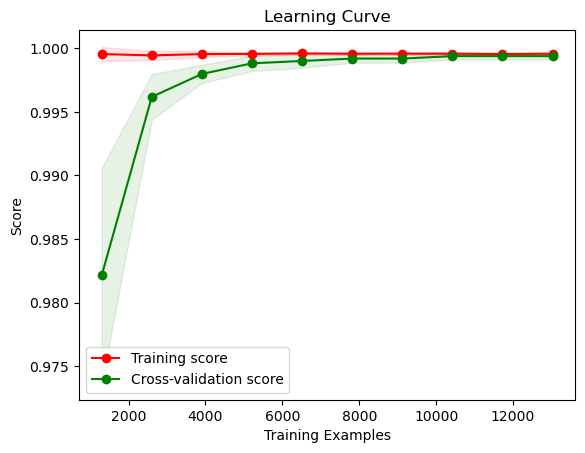

Accuracy : 0.840
Number of unique merchants in the test set:  94
Number of unique merchants in the predicted set:  84
Number of unique merchants in train set:  236

Number of unique "Transaction Details" rows in test set:  791
Number of unique "Transaction Details" rows in train set:  199

Total number of rows in the train set:  800
Total number of rows in the test set 200
Train accuracy: 0.99875
Test accuracy: 0.84


Percentage of best precision 50.442477876106196

Percentage of best recall 58.4070796460177

Percentage of best f1score 49.557522123893804



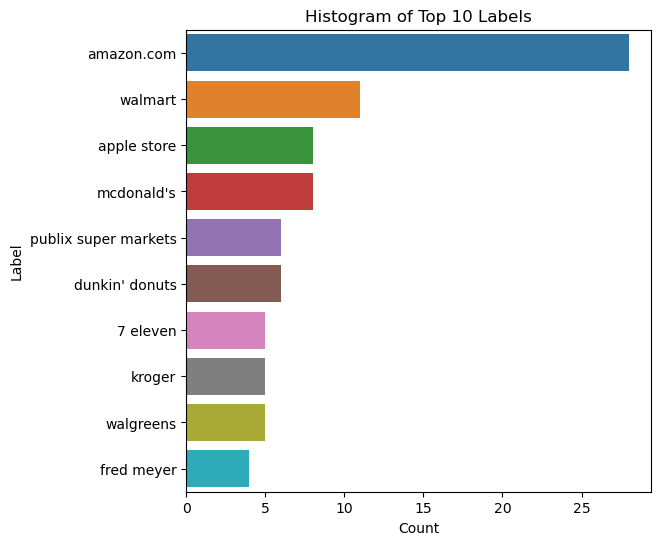

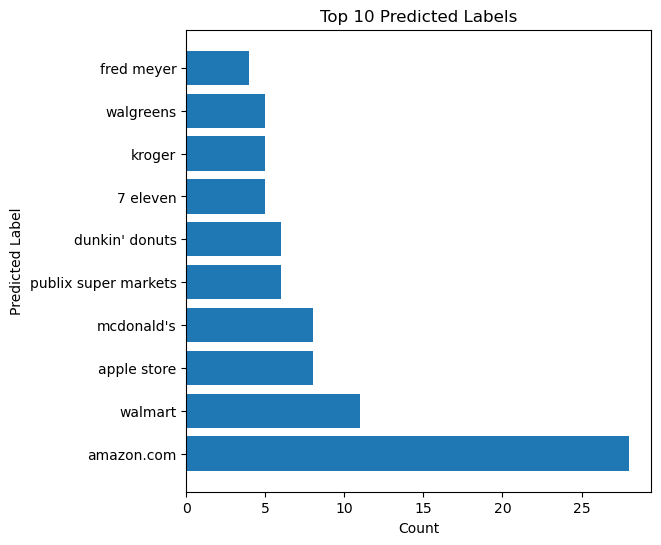

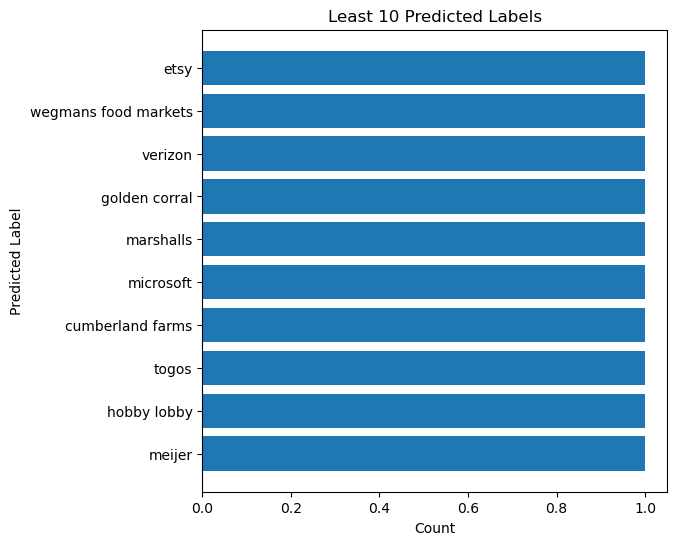

amazon.com: 28
walmart: 11
apple store: 8
mcdonald's: 8
publix super markets: 6
dunkin' donuts: 6
7 eleven: 5
kroger: 5
walgreens: 5
fred meyer: 4


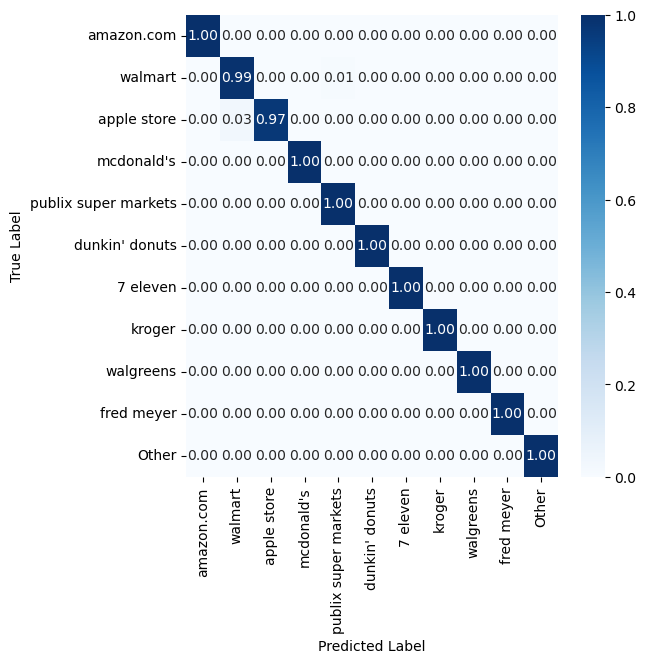

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

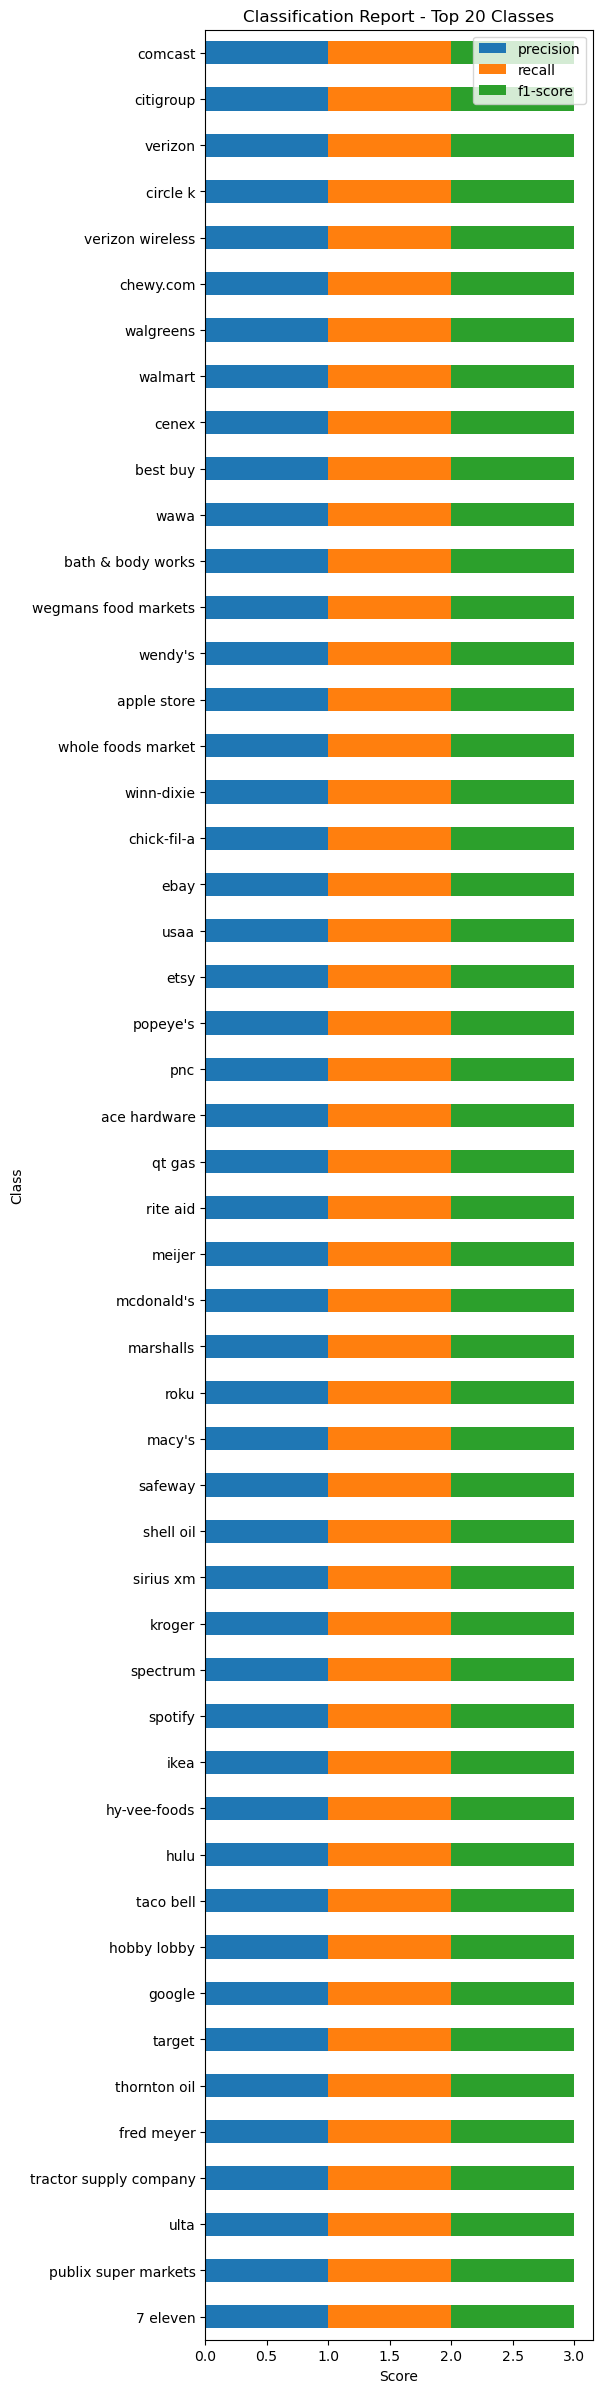



                          precision    recall  f1-score   support

               7 eleven       1.00      1.00      1.00         5
           ace hardware       1.00      1.00      1.00         1
           acme markets       0.00      0.00      0.00         1
               allstate       0.00      0.00      0.00         0
             amazon.com       1.00      0.97      0.98        29
              amazonvod       0.50      1.00      0.67         1
            apple store       1.00      1.00      1.00         8
                   at&t       0.50      1.00      0.67         1
        bank of america       0.00      0.00      0.00         0
      bath & body works       1.00      1.00      1.00         1
                   belk       0.00      0.00      0.00         1
               best buy       1.00      1.00      1.00         1
                  cenex       1.00      1.00      1.00         1
            centurylink       0.00      0.00      0.00         2
                chevr

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [21]:
from sklearn.svm import LinearSVC

classifier2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), #('scaler', StandardScaler(with_mean=False)),
                        ('classifier', LinearSVC(C=1.0))])

train(classifier2, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

SVC = cls_acc
Stime = cls_time
# print("\n\nSVC: ", SVC)
# print("Time: ", Stime)